In [118]:
import numpy as np
import torch 
import cv2
import torch.nn as nn 
import pandas as pd
import os
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
import time
import torch.nn.functional as F
import torch.optim as optim 

In [119]:
#make data
REBUILD_DATA = False

class CatsVSDogs():
    
    # Size of the image
    IMG_SIZE = 50
    
    # Directory location
    CATS = 'D:/ML_data_sql/PetImages/Cat/'
    DOGS = 'D:/ML_data_sql/PetImages/Dog/'
    
    # Labels for cats and dogs
    LABELS = {CATS:0, DOGS:1}
    
    # Initializing variables
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            
            # Looping through each pictures
            for f in tqdm(os.listdir(label)):
                
                try:
                    path = os.path.join(label, f)

                    # Reading images and converting to grayscale
                    img = cv2.imread(path, cv2.IMREAD_COLOR)

                    # Resizing images
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

                    # Getting the training data
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    # Checking distribution of data
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                        
                except Exception as e:
                    pass

            np.random.shuffle(self.training_data)
            np.save("training_data_color.npy", self.training_data)
            print("Cates: ", self.catcount)
            print("Dogs: ", self.dogcount)
            
if REBUILD_DATA:
    catsvdogs = CatsVSDogs()
    catsvdogs.make_training_data()

In [120]:
training_data = np.load("training_data.npy", allow_pickle = True)

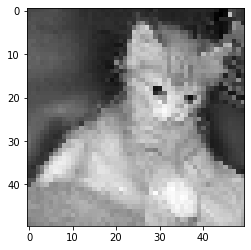

In [121]:
#展示一下图片
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(training_data[1][0],cmap='gray')

In [122]:
#7:3 分别训练 先标准化 并load data
# Getting the features
X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
# Scaling the features
X = X/255.0
# Getting the target
y = torch.Tensor([i[1] for i in training_data])

In [123]:
#split train and test
val = int(len(X)*0.3)
train_X = X[:-val]
test_X = X[-val:]
train_y = y[:-val]
test_y = y[-val:]

In [124]:
#model
class Classfication(nn.Module):
    def __init__(self):
        super(Classfication,self).__init__()
        #tensor 50* 50*1
        self.conv1 = nn.Conv2d(1,64,3)
        self.conv2 = nn.Conv2d(64,128,3)
        self.conv3 = nn.Conv2d(128,64,5,1,1)
        self.conv4 = nn.Conv2d(64,32,3)
        self.fc1 = nn.Linear(32*4*4,128)
        self.fc2 = nn.Linear(128,2)
    def forward(self,x):
        in_size = x.size(0)
        #50
        out = self.conv1(x) #1*48*48
        out = F.relu(out)
        out = F.max_pool2d(out,2)    # 1*24*24
        out = self.conv2(out)   # 1*22 *22
        out = F.relu(out)
        out = F.max_pool2d(out,2)   # 1*11*11
        #(H-K+2*P)/S+1, (11-5+2) +1 ==9
        out = self.conv3(out)   # 1*9*9
        out = F.relu(out)   # 7*7
        out = self.conv4(out)
        # print(out.shape)
        out = F.max_pool2d(out,2,padding=1)
        out = out.view(in_size,-1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.softmax(out,dim=1)
        return out


In [125]:
#settings 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
# print(device)
model = Classfication().to(device)
cirection = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [126]:
from tqdm.notebook import tqdm

BATCH_SIZE = 100
# Number of Epochs
EPOCHS = 50
# Model Training
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50,50).to(device)
        batch_y = train_y[i:i+BATCH_SIZE].to(device)
        model.zero_grad()
        outputs = model(batch_X)
        loss = cirection(outputs, batch_y)
        loss.backward()
        optimizer.step()


  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

In [129]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = model(test_X[i].view(-1,1,50,50).to(device))
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct += 1
        total +=1
print("Accuracy: ", round(correct/total, 4))

  0%|          | 0/7483 [00:00<?, ?it/s]

Accuracy:  0.7906


In [130]:
torch.save(model,'cat_dog_52.pth')

In [131]:
model.eval()

Classfication(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)